In [1]:
import pandas as pd 
import numpy as np
from matplotlib.colors import LinearSegmentedColormap, TwoSlopeNorm
import matplotlib.pyplot as plt
import matplotlib.lines as mlines

In [ ]:
# p values IF2
pvalues_path=r"p_values_IF2.tsv"
pvalues_IF2=pd.read_csv(pvalues_path, sep='\t', index_col=0)

# correlations IF2
correlations_path=r"correlations_IF2.tsv"
correlations_IF2=pd.read_csv(correlations_path, sep='\t', index_col=0)

# p values IMC P1
pvalues_path=r"p_values_NSCLC2_P1.tsv"
pvalues_NSCLC2_P1=pd.read_csv(pvalues_path, sep='\t', index_col=0)

# correlations IMC P1
correlations_path=r"correlations_NSCLC2_P1.tsv"
correlations_NSCLC2_P1=pd.read_csv(correlations_path, sep='\t', index_col=0)


# p values IF additions
pvalues_path=r"p_values_IF_additions.tsv"
pvalues_IF_additions=pd.read_csv(pvalues_path, sep='\t', index_col=0)

# correlations IF additions
correlations_path=r"correlations_IF_additions.tsv"
correlations_IF_additions=pd.read_csv(correlations_path, sep='\t', index_col=0)

In [ ]:
def bubble_plot(df_cor, df_pval, new_order, cluster_boundaries, title):
    
    df_pval = df_pval.reindex(columns=new_order)
    df_cor = df_cor.reindex(columns=new_order)

    arr_cor = df_cor.to_numpy()
    arr_pval = df_pval.to_numpy()

    # Convert string values to float if needed
    arr_cor = arr_cor.astype(float)
    arr_pval = arr_pval.astype(float)

    x, y = np.meshgrid(np.arange(arr_cor.shape[1]), np.arange(arr_cor.shape[0]))

    x = x.flatten()
    y = y.flatten()
    cor = arr_cor.flatten()
    pval = arr_pval.flatten()

    plt.figure(figsize=(max(12, len(new_order)), 8))

    size_scale = -np.log(pval)*110
    color_scale = cor
    edge_colors = ['black' if p <= 0.05 else 'white' for p in pval]
    linewidths = [1.5 if p <= 0.05 else 0 for p in pval]

    vmin = min(color_scale.min(), -color_scale.max())
    vmax = max(color_scale.max(), -color_scale.min())
    norm = TwoSlopeNorm(vmin=vmin, vcenter=0, vmax=vmax)

    scatter = plt.scatter(x, y, s=size_scale, c=color_scale, cmap='seismic', norm=norm, edgecolors=edge_colors, linewidths=linewidths)
    plt.gca().invert_yaxis()

    for boundary in cluster_boundaries:
        plt.axvline(x=boundary - 0.5, color='black', linestyle='--')


    # Add cluster labels
    cluster_labels = [f"Cluster {i}" for i in range(len(cluster_boundaries) + 1)]
    cluster_positions = []

    all_bounds = [0] + cluster_boundaries + [len(new_order)]
    for start, end in zip(all_bounds[:-1], all_bounds[1:]):
        cluster_positions.append((start + end - 1) / 2)

    for pos, label in zip(cluster_positions, cluster_labels):
        plt.text(pos, -1, label, ha='center', va='center', fontsize='medium')


    cbar = plt.colorbar(scatter, label='Correlation', pad=0.01)
    cbar.outline.set_visible(False)

    # Add column names as x-ticks
    column_names = df_cor.columns
    plt.xticks(np.arange(len(column_names)), column_names, rotation=90)

    # Add row names as y-ticks
    row_names = df_cor.index
    plt.yticks(np.arange(len(row_names)), row_names)



    p_values = [0.01, 0.05, 0.1, 0.2, 0.4, 0.8]
    size_vals_legend = [-np.log(p)*110 for p in p_values]
    labels = [f"{p}" for p in p_values]


    sig_marker = mlines.Line2D([], [], color='gray', marker='o', linestyle='None',
                            markersize=17, markeredgewidth=1.5, markeredgecolor='black',
                            label='p ≤ 0.05')

    handles = [plt.scatter([], [], s=s, c='gray', edgecolors='none') for s in size_vals_legend]
    handles.append(sig_marker)

    plt.legend(handles, labels + ["p ≤ 0.05"], 
            title="p-value", 
            labelspacing=2,
            handletextpad=1.5,
            borderpad=1.0,
            fontsize='small',
            loc="upper left", 
            bbox_to_anchor=(-0.3, 1),
            borderaxespad=0,
            ncol=1)
    
    #plt.title(title)
    plt.title(title, pad=40)
    plt.tight_layout()
    plt.subplots_adjust(bottom=0.2, right=0.8, left=0.25)
    plt.show()

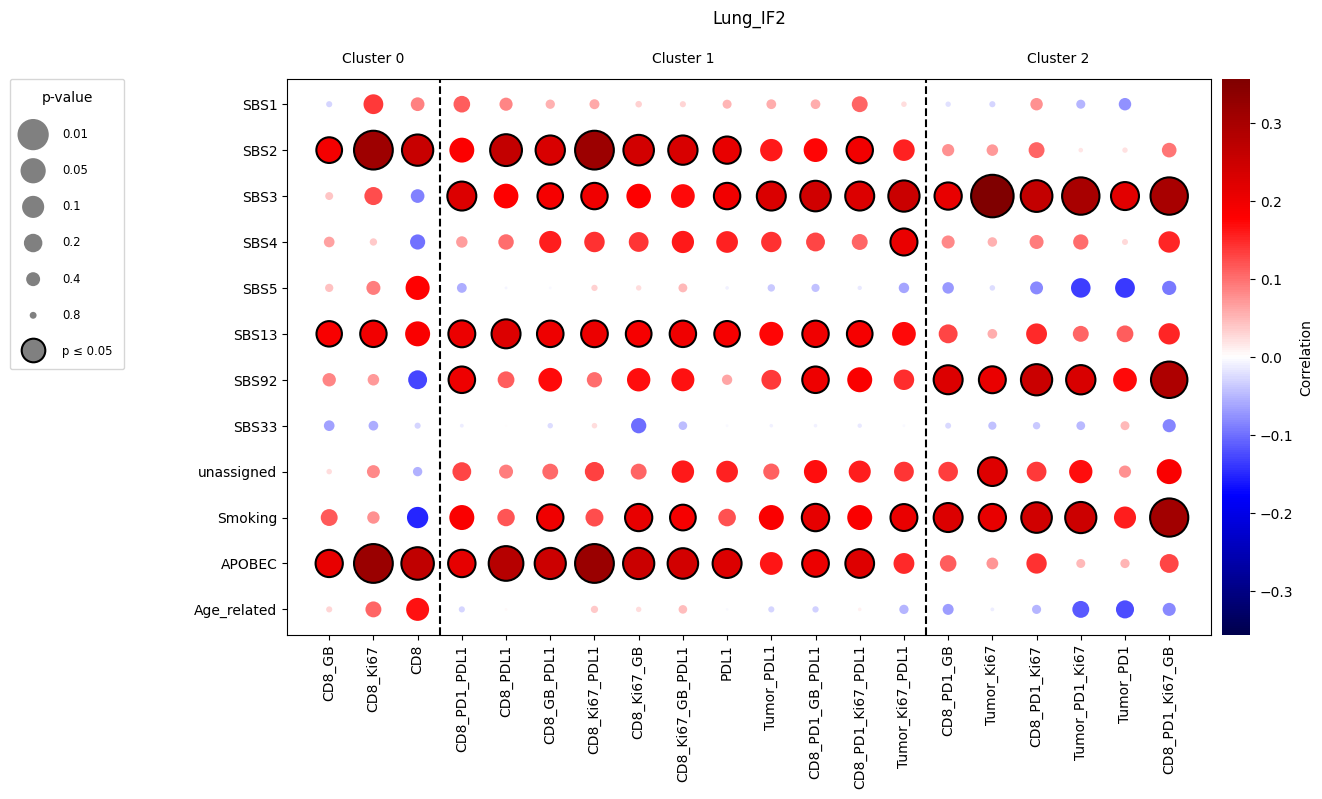

In [4]:
new_order = ["CD8_GB", "CD8_Ki67", "CD8", "CD8_PD1_PDL1", "CD8_PDL1", 
                "CD8_GB_PDL1", "CD8_Ki67_PDL1", "CD8_Ki67_GB",  "CD8_Ki67_GB_PDL1",
                "PDL1", "Tumor_PDL1", "CD8_PD1_GB_PDL1", "CD8_PD1_Ki67_PDL1",
                "Tumor_Ki67_PDL1", "CD8_PD1_GB", "Tumor_Ki67", "CD8_PD1_Ki67", 
                "Tumor_PD1_Ki67", "Tumor_PD1", "CD8_PD1_Ki67_GB"]

cluster_boundaries = [3, 14]

bubble_plot(correlations_IF2, pvalues_IF2, new_order, cluster_boundaries, "Lung_IF2")

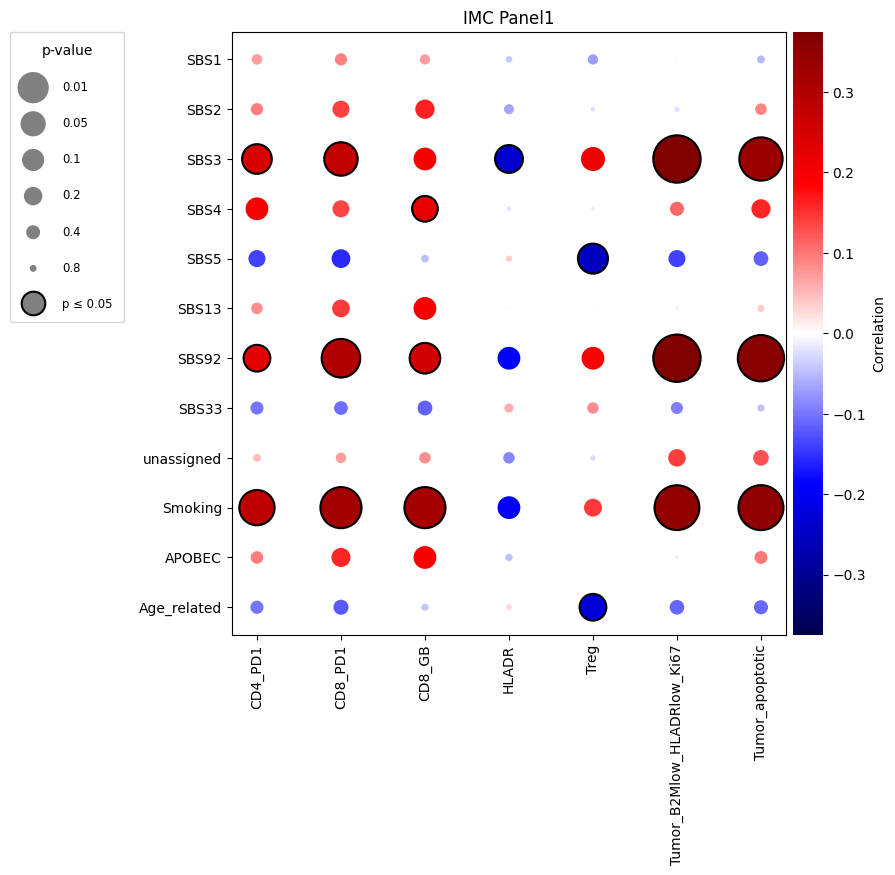

In [ ]:
correlations_NSCLC2_P1.rename(columns={"CD8_GrzB": "CD8_GB"}, inplace=True)
pvalues_NSCLC2_P1.rename(columns={"CD8_GrzB":"CD8_GB"}, inplace=True)


new_order = ["CD4_PD1", "CD8_PD1", "CD8_GB", "HLADR", "Treg",
            "Tumor_B2Mlow_HLADRlow_Ki67", "Tumor_apoptotic"]


cluster_boundaries = []

bubble_plot(correlations_NSCLC2_P1, pvalues_NSCLC2_P1, new_order, cluster_boundaries, "IMC Panel1")

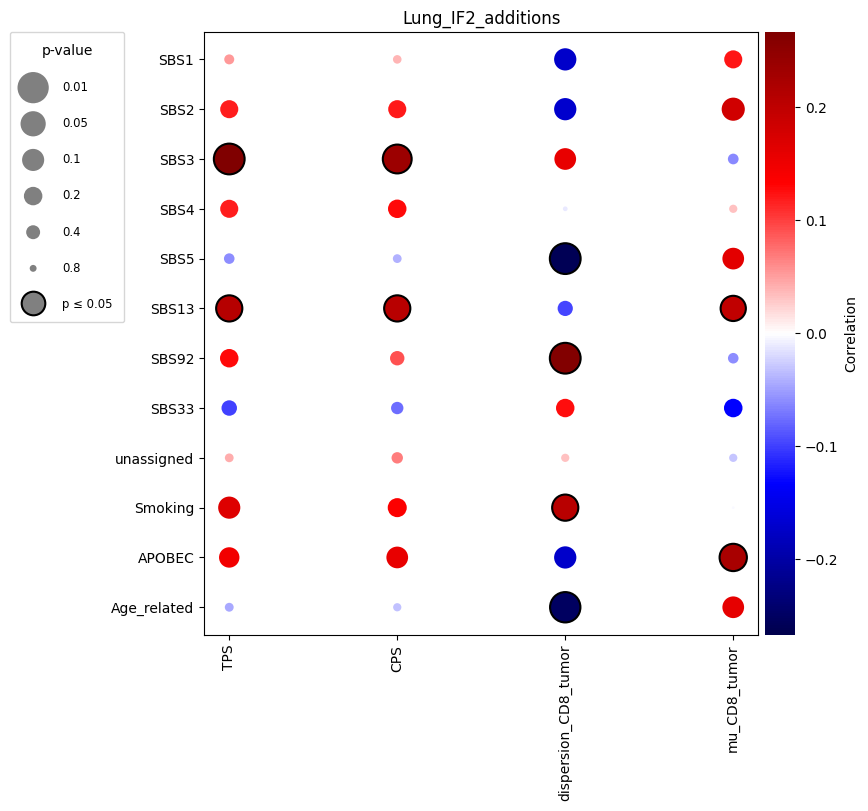

In [ ]:
new_order = ['TPS', 'CPS', 'dispersion_CD8_tumor', 'mu_CD8_tumor']
cluster_boundaries = []

bubble_plot(correlations_IF_additions, pvalues_IF_additions, new_order, cluster_boundaries, "Lung_IF2_additions")